<div class="alert alert-info">
<center>
<h1 style="font-size:22px">How to convert radiances to brightness temperatures for VIIRS ?</h1>
<br>
Benjamin H.G. Marchant <br>
benjamin.marchant@nasa.gov <br>
marchant.benjamin01@gmail.com <br>
</center>
</div>

python netcdf scale_factor not by default
- [Example to use scale_factor and add_offset in netCDF4 with Python?](https://stackoverflow.com/questions/54824033/example-to-use-scale-factor-and-add-offset-in-netcdf4-with-python)
- [Packed Data Values](https://www.unidata.ucar.edu/software/netcdf/workshops/2010/bestpractices/Packing.html)
- [ VIIRS L1B Calibrated Radiance Product File Specifications   ](https://ladsweb.modaps.eosdis.nasa.gov/filespec/VIIRS/1/VNP02MOD)
- [What are NetCDF files and how can I read them](https://confluence.ecmwf.int/display/CKB/What+are+NetCDF+files+and+how+can+I+read+them)


In [122]:
import glob
import pprint
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import random
import cartopy.crs as ccrs
import importlib
import netCDF4
import numpy.ma as ma
import matplotlib.cm as cm
import warnings

from pyhdf.SD import SD, SDC 
from pyhdf.HDF import *
from pyhdf.VS import *
from calendar import monthrange
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy import config
from os import path

warnings.filterwarnings('ignore')

In [76]:
path_to_media = '/Volumes/HD1/media/'

In [77]:
year = 2014
month = 2
day = 1

In [78]:
files = glob.glob('{}VIIRS/VNP02MOD/{:04d}/{:04d}_{:02d}_{:02d}/*nc'.format(path_to_media,year,year,month,day))

for file in files[0:4]:
    print(file.split('/')[-1])

VNP02MOD.A2014032.0000.001.2017254015001.nc
VNP02MOD.A2014032.0006.001.2017254013417.nc
VNP02MOD.A2014032.0012.001.2017254015050.nc
VNP02MOD.A2014032.0018.001.2017254015101.nc


In [79]:
file = random.choice( files )

f = netCDF4.Dataset(file)

print(f.__dict__.keys())

dict_keys(['title', 'platform', 'instrument', 'product_name', 'LocalGranuleID', 'LongName', 'ShortName', 'processing_version', 'Conventions', 'institution', 'license', 'naming_authority', 'date_created', 'ProductionTime', 'keywords_vocabulary', 'stdname_vocabulary', 'creator_name', 'creator_email', 'creator_url', 'project', 'publisher_name', 'publisher_url', 'publisher_email', 'processing_level', 'cdm_data_type', 'orbit_number', 'history', 'source', 'time_coverage_start', 'time_coverage_end', 'PGE_StartTime', 'PGE_EndTime', 'StartTime', 'EndTime', 'PGE_Name', 'VersionId', 'startDirection', 'endDirection', 'DayNightFlag', 'format_version', 'instrument_number', 'number_of_filled_scans', 'identifier_product_doi_authority', 'identifier_product_doi', 'GRingPointLatitude', 'GRingPointLongitude', 'GRingPointSequenceNo', 'SouthBoundingCoordinate', 'NorthBoundingCoordinate', 'EastBoundingCoordinate', 'WestBoundingCoordinate', 'ProcessingEnvironment', 'AlgorithmVersion', 'AlgorithmType', 'InputP

In [80]:
gd_group = f.groups['observation_data']

In [81]:
gd_group.variables.keys()

dict_keys(['M07', 'M07_quality_flags', 'M07_uncert_index', 'M08', 'M08_quality_flags', 'M08_uncert_index', 'M10', 'M10_quality_flags', 'M10_uncert_index', 'M11', 'M11_quality_flags', 'M11_uncert_index', 'M12', 'M12_quality_flags', 'M12_brightness_temperature_lut', 'M12_uncert_index', 'M13', 'M13_quality_flags', 'M13_brightness_temperature_lut', 'M13_uncert_index', 'M14', 'M14_quality_flags', 'M14_brightness_temperature_lut', 'M14_uncert_index', 'M15', 'M15_quality_flags', 'M15_brightness_temperature_lut', 'M15_uncert_index', 'M16', 'M16_quality_flags', 'M16_brightness_temperature_lut', 'M16_uncert_index'])

In [82]:
data = gd_group.variables['M12']

print(data)
print(data.shape)

<class 'netCDF4._netCDF4.Variable'>
uint16 M12(number_of_lines, number_of_pixels)
    long_name: M-band 12 earth view radiance
    units: Watts/meter^2/steradian/micrometer
    _FillValue: 65535
    valid_min: 0
    valid_max: 65527
    scale_factor: 7.630442e-05
    add_offset: 0.000834405
    flag_values: [65532 65533 65534]
    flag_meanings: Missing_EV Bowtie_Deleted Cal_Fail
path = /observation_data
unlimited dimensions: 
current shape = (3232, 3200)
filling on
(3232, 3200)


In [83]:
scale_factor = data.scale_factor
add_offset = data.add_offset

In [84]:
masked_data = ( ( data[:] - add_offset) / scale_factor ).astype(int)
#masked_data = ( data[:] - add_offset) / scale_factor 

print( masked_data.shape )

(3232, 3200)


In [85]:
data[:]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [0.018308117985725403, 0.018308117985725403,
         0.019986815750598907, ..., 0.03807096183300018,
         0.03807096183300018, 0.03974965959787369],
        ...,
        [0.04112314060330391, 0.04356488212943077, 0.048448365181684494,
         ..., 0.29437750577926636, 0.28705230355262756,
         0.2903333902359009],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=65535,
  dtype=float32)

In [86]:
#masked_data = data[:]

In [87]:
data =  ma.getdata(masked_data)

data
print( data )
print( data.shape )

[[65533 65533 65533 ... 65533 65533 65533]
 [65533 65533 65533 ... 65533 65533 65533]
 [  229   229   251 ...   487   487   509]
 ...
 [  528   560   624 ...  3846  3751  3794]
 [65533 65533 65533 ... 65533 65533 65533]
 [65533 65533 65533 ... 65533 65533 65533]]
(3232, 3200)


In [88]:
data.min()

0

In [89]:
data.max()

65533

In [90]:
data[ data < data.max() ].max()

22624

In [91]:
data_shape = data.shape

In [92]:
data.shape

(3232, 3200)

In [93]:
data[ data < data.max() ].ravel().shape

(9010816,)

In [94]:
3248*3200

10393600

[]

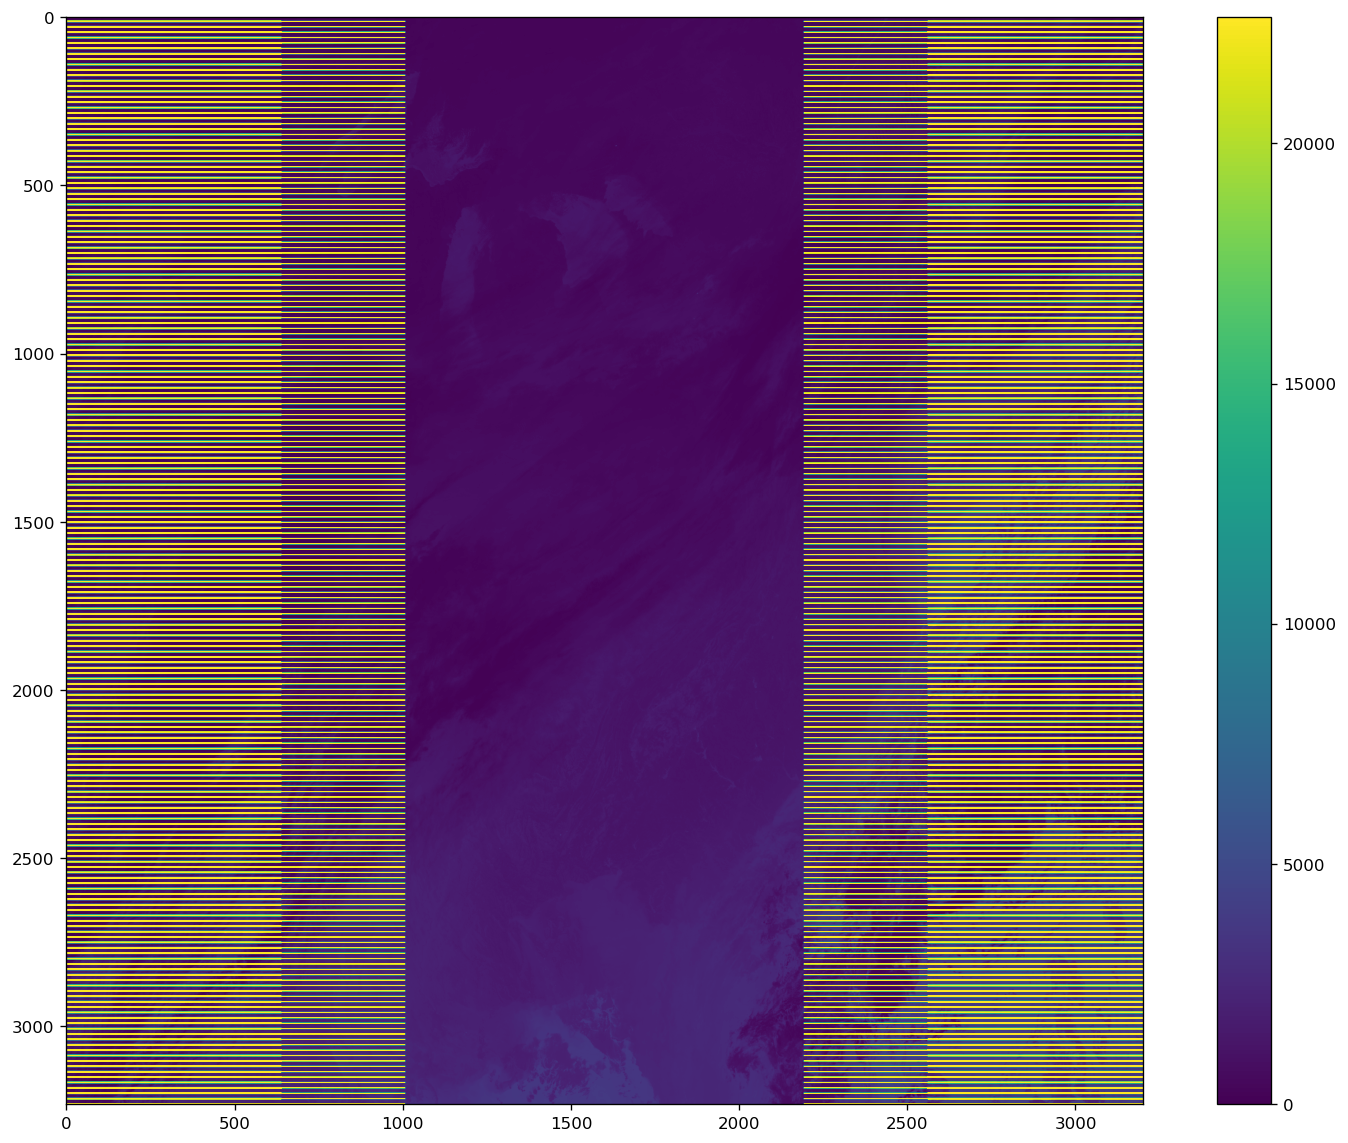

In [95]:
fig = plt.figure(num=None, figsize=(16, 12), dpi=120, facecolor='w', edgecolor='k')

plt.imshow(data,vmax=data[ data < data.max() ].max())

plt.colorbar()

plt.plot()

In [96]:
# TEST 

#data = data.flatten() 

#data = data.reshape(data_shape)

#fig = plt.figure(num=None, figsize=(16, 12), dpi=120, facecolor='w', edgecolor='k')

#plt.imshow(data,vmax=data[ data < data.max() ].max())

#plt.colorbar()

#plt.plot()

In [97]:
df = pd.DataFrame()

df['M12'] = data.flatten() 

<AxesSubplot:>

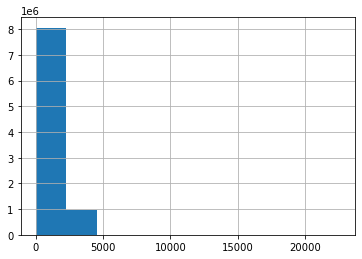

In [119]:
df['M12'][ df['M12'] <  data.max() ].hist()

In [98]:
M12_brightness_temperature_lut = gd_group.variables['M12_brightness_temperature_lut']

M12_brightness_temperature_lut

<class 'netCDF4._netCDF4.Variable'>
float32 M12_brightness_temperature_lut(number_of_LUT_values)
    long_name: M-band 12 brightness temperature lookup table
    units: Kelvin
    _FillValue: -999.9
    valid_min: 203.0
    valid_max: 372.42026
path = /observation_data
unlimited dimensions: 
current shape = (65536,)
filling on

In [99]:
M12_brightness_temperature_lut.shape

(65536,)

In [100]:
masked_data = M12_brightness_temperature_lut[:]

masked_data

masked_array(data=[203.0, 203.93453979492188, 204.80145263671875, ..., --,
                   --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-999.9,
            dtype=float32)

In [101]:
M12_brightness_temperature_lut =  ma.getdata(masked_data)

M12_brightness_temperature_lut

array([ 203.     ,  203.93454,  204.80145, ..., -999.9    , -999.9    ,
       -999.9    ], dtype=float32)

In [102]:
M12_brightness_temperature_lut[ M12_brightness_temperature_lut < M12_brightness_temperature_lut.max() ].max()

372.4197

In [103]:
M12_brightness_temperature_lut.shape

(65536,)

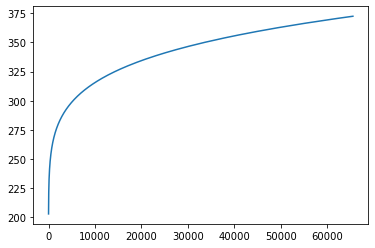

In [104]:
#plt.plot(M12_brightness_temperature_lut)

#plt.show()

plt.plot(M12_brightness_temperature_lut[M12_brightness_temperature_lut[:]>0.0])

plt.show()

In [105]:
lut = gd_group.variables['M12_brightness_temperature_lut']

lut_data = lut[:]

lut_data

masked_array(data=[203.0, 203.93453979492188, 204.80145263671875, ..., --,
                   --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-999.9,
            dtype=float32)

In [106]:
def mapping_function(x):
    return lut_data[x]

<AxesSubplot:>

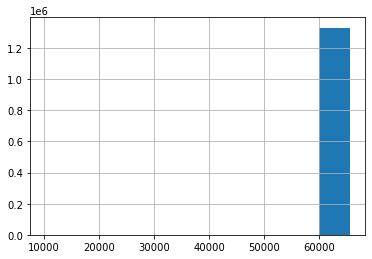

In [116]:
df['M12'][ df['M12'] > 10000 ].hist()

In [107]:
df['M12_bt'] = df['M12'].apply(mapping_function)

In [108]:
df['M12_bt']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
10342395    0.0
10342396    0.0
10342397    0.0
10342398    0.0
10342399    0.0
Name: M12_bt, Length: 10342400, dtype: float64

[]

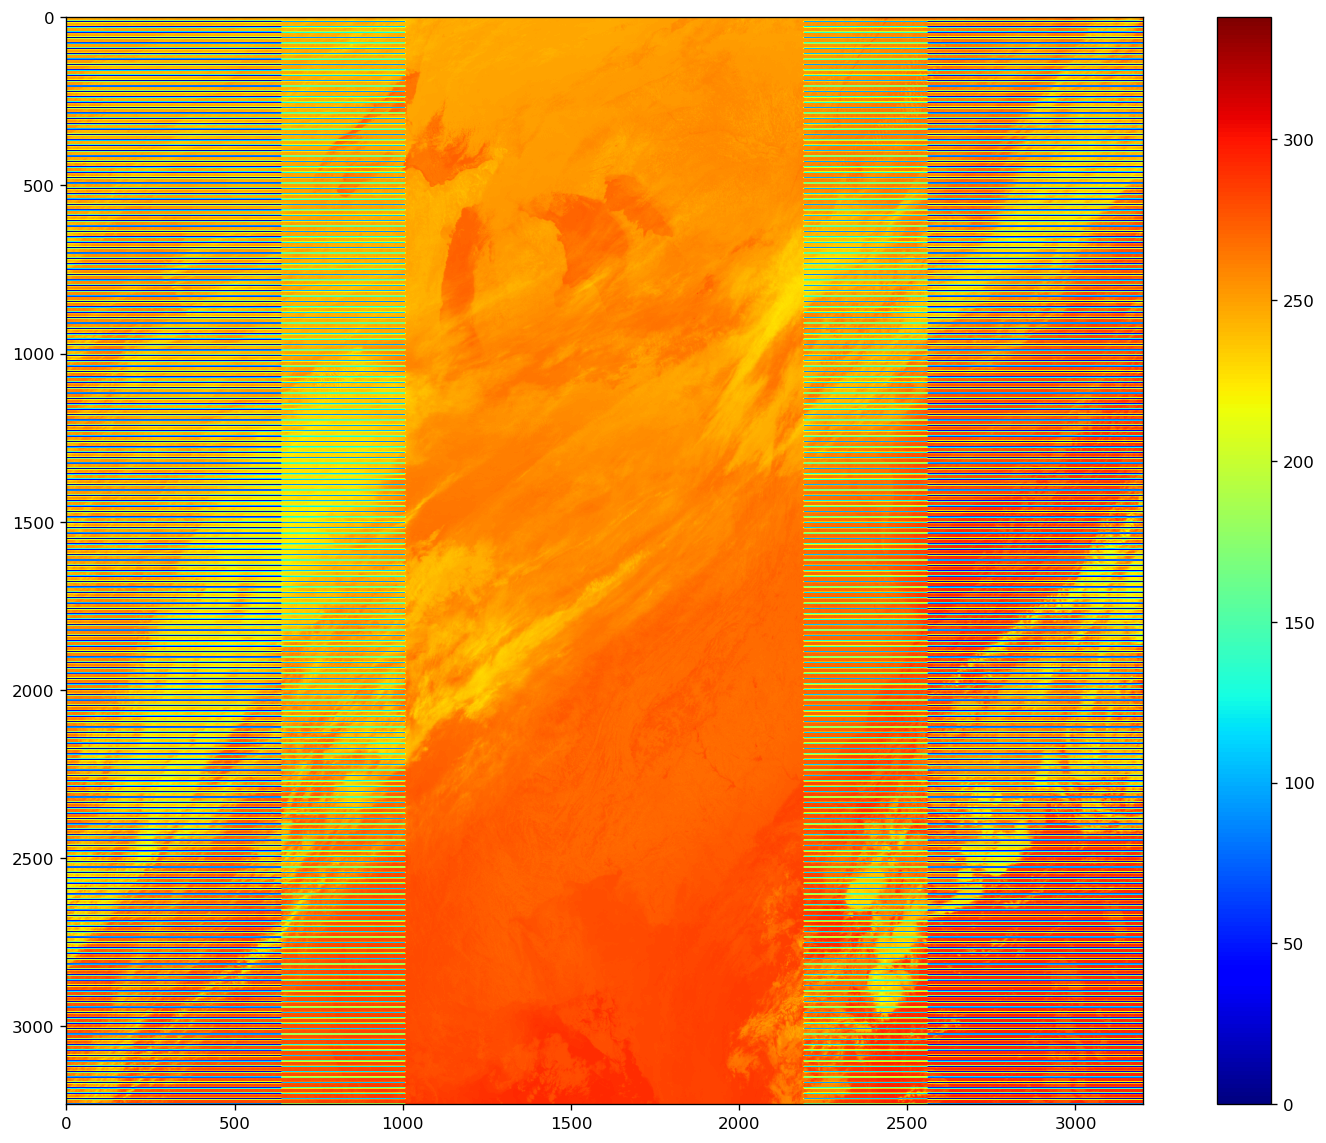

In [123]:
fig = plt.figure(num=None, figsize=(16, 12), dpi=120, facecolor='w', edgecolor='k')

plt.imshow(df['M12_bt'].to_numpy().reshape(data_shape),cmap=cm.jet)

plt.colorbar()

plt.plot()